<a href="https://colab.research.google.com/github/SamikshaBhavsar/The_sparks_Foundation/blob/master/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 2 - To Explore Supervised Machine Learning (Linear Regession)**

**Predict the percentage of marks that a student is expected to score based upon the number of hours they studied**

**Importing required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Importing Dataset**

In [ ]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")



Data imported successfully


In [ ]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86



**Exploratory Data Analysis**


In [ ]:
df.shape

(25, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Let's plot our data points on Scatter Plot.**

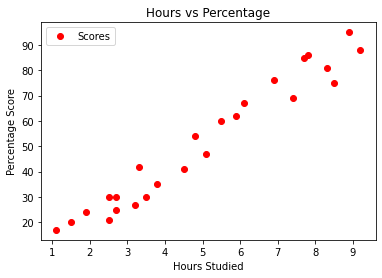

In [ ]:
df.plot(x='Hours', y='Scores', style='o',c='red')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()


**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

**Let's plot our data points on Pair Plot.**



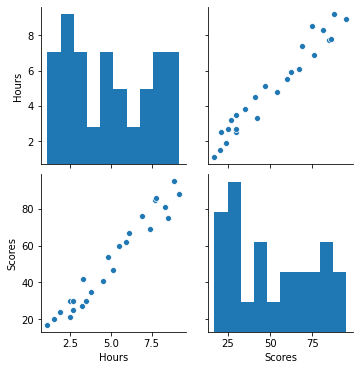

In [ ]:
sns.pairplot(df)
plt.show()

**Let's plot our data points on Dist Plot.**

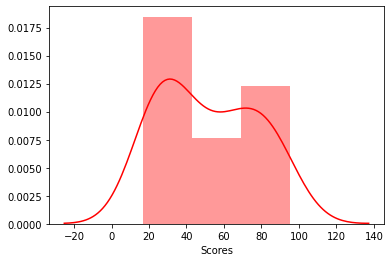

In [ ]:
sns.distplot(df['Scores'],color='red')
plt.show()

In [ ]:
print("Average Percentage Score - ",df['Scores'].mean())

Average Percentage Score -  51.48


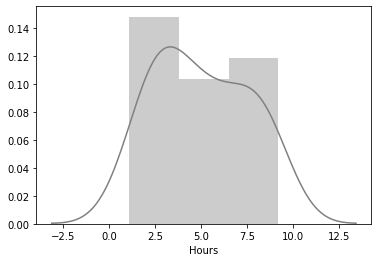

In [ ]:
sns.distplot(df['Hours'],color='grey')
plt.show()

In [ ]:
print("Average Study Hours - ",df['Hours'].mean())

Average Study Hours -  5.012


**Average Percentage Score - 51.48 %**

**Average Study Hours - 5.012 hours** 


**Let's plot our data points on Histograms**

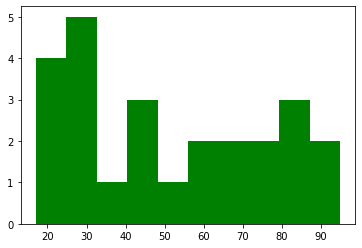

In [ ]:
plt.hist(df['Scores'],color = 'green')
plt.show()

**From the above Histogram we can conclude that most students score between 25%-30%**

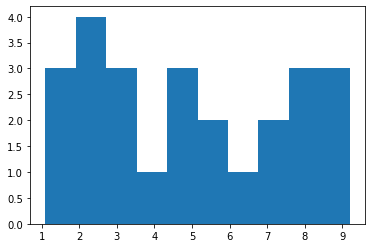

In [ ]:
plt.hist(df['Hours'])
plt.show()

**From the above Histogram we can conclude that most students study for 2-3 hours.**

**Heatmap**

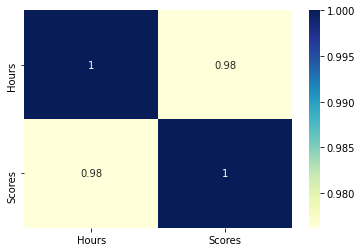

In [ ]:
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)
plt.show()

**Preparing the data**

*   **Splitting the dataset into Features** 




In [ ]:
X = df.iloc[:,:-1].values
y= df.iloc[:,1].values

*   **Splitting the dataset into the Training set and Test set**



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state= 0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18, 1)
(7, 1)
(18,)
(7,)


**Feature Scaling**

In [ ]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Training Linear Regression Model on the Training set**

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

print("Training complete.")

Training complete.


**Predicting Test Results**

In [ ]:
y_pred = reg.predict(X_test)
y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

**Evaluating the model**

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.130879918502482


**Finding Coefficient and intercept of regression line**

In [ ]:
print("Coefficient of the regression- " , reg.coef_[0])
print("Y_Intercept of the regression- " , reg.intercept_)

Coefficient of the regression-  24.472312260531083
Y_Intercept of the regression-  56.666666666666664


In [ ]:
print("Y = "+str(reg.coef_[0])+"*X + "+str(reg.intercept_))
#line = reg.coef_*X_train+reg.intercept_

Y = 24.472312260531083*X + 56.666666666666664


**Visualising the Training set results**

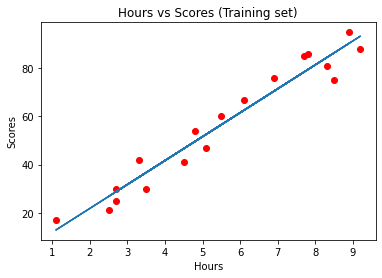

In [ ]:
plt.scatter(X_train_copy, y_train, color = 'red')
plt.plot(X_train_copy, reg.predict(X_train))
plt.title('Hours vs Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

**Visualising the Test set results**

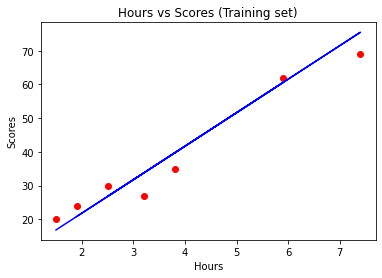

In [ ]:
plt.scatter(X_test_copy, y_test, color = 'red')
plt.plot(X_test_copy, y_pred, color = 'blue')
plt.title('Hours vs Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

**Comparing Actual vs Predicted**

In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


**Testing with our own data**

In [ ]:
hours = 9.25
own_pred = reg.predict(sc.transform([[hours]]))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.89272889341652
